## Code to analyze cleaned and prepared toxicity dataset
Functionality includes:
- PCA on featurized input and visualization of component space
- total unique molecules
- toxicity metric range

Input is a deepchem dataset object.

In [30]:
import deepchem
import altair
import numpy as np
import rdkit
import rdkit.Chem
import pandas
import sklearn.decomposition
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

In [2]:
## produce a fake incoming dataset temporarily
# load from deepchem
task, dataset, transformer = deepchem.molnet.load_bace_regression(splitter=None, featurizer=deepchem.feat.RawFeaturizer())

In [3]:
# un normalize
y = transformer[0].untransform(dataset[0].y)
X = dataset[0].X

In [4]:
dataframe = pandas.DataFrame(data=y, columns=['pIC50'])
dataframe['mol'] = X
dataframe['smiles'] = dataframe['mol'].apply(lambda mol: rdkit.Chem.MolToSmiles(mol))
dataframe

,pIC50,mol,smiles
0,9.154901,<rdkit.Chem.rdchem.Mol object at 0x1b4cfd420>,Cc1ccccc1-c1ccc2nc(N)c(C[C@@H](C)C(=O)N[C@@H]3...
1,8.853872,<rdkit.Chem.rdchem.Mol object at 0x1b4d5f0a0>,CCCO[C@H]1C[NH2+][C@@H]([C@@H](O)[C@H](Cc2cc(F...
2,8.698970,<rdkit.Chem.rdchem.Mol object at 0x1b4d5f148>,CCc1cn2c3c(cc(C(=O)N[C@@H](Cc4ccccc4)[C@H](O)C...
3,8.698970,<rdkit.Chem.rdchem.Mol object at 0x1b4d5f308>,CCOC[C@@H](Oc1cc(C[C@@H]2CS(=O)(=O)C[C@H]([NH2...
4,8.698970,<rdkit.Chem.rdchem.Mol object at 0x1b4d5f110>,CCc1cn2c3c(cc(C(=O)N[C@@H](Cc4ccccc4)[C@H](O)C...
...,...,...,...
1508,3.000000,<rdkit.Chem.rdchem.Mol object at 0x1b4dfae30>,CCC(CC(=O)NCC1CCOCC1)n1c(N)nc2cc(Cl)ccc21
1509,3.000000,<rdkit.Chem.rdchem.Mol object at 0x1b4dfaea0>,CCC(CC(=O)NCc1ccccn1)n1c(N)nc2cc(Cl)ccc21
1510,2.953115,<rdkit.Chem.rdchem.Mol object at 0x1b4dfaf10>,Cn1c(N)nc(C2CC2c2cccc(Br)c2)cc1=O
1511,2.733298,<rdkit.Chem.rdchem.Mol object at 0x1b4dfaf80>,Cn1c(N)nc(C2CC2c2cccc(-c3ccccc3)c2)cc1=O


### percent unique molecules

In [5]:
print('Percent of molecule examples that are unique compounds: {}'.format(
     float(len(np.unique(dataframe['smiles']))/len(dataframe)*100)
     ))

Percent of molecule examples that are unique compounds: 100.0


### Tox target range: pIC50

In [6]:
print('pIC50 min, max: {}, {}'.format(y.min(), y.max()))

pIC50 min, max: 2.5445460999999994, 10.522879


In [7]:
altair.Chart(dataframe[['pIC50', 'smiles']]).mark_bar().encode(
    altair.X("pIC50", bin=True),
    y='count()',
)

alt.Chart(...)

### Some basic molecular features

In [8]:
import rdkit.Chem.Descriptors

In [9]:
mol = dataframe.loc[0, 'mol']

In [10]:
dataframe['mw'] = dataframe['mol'].apply(lambda mol: rdkit.Chem.Descriptors.ExactMolWt(mol))

In [11]:
dataframe['max_abs_partial_charge'] = dataframe['mol'].apply(lambda mol: rdkit.Chem.Descriptors.MaxAbsPartialCharge(mol))

In [12]:
altair.Chart(dataframe[['mw', 'smiles']]).mark_bar().encode(
    altair.X("mw", bin=True),
    y='count()',
)

alt.Chart(...)

In [13]:
altair.Chart(dataframe[['max_abs_partial_charge', 'smiles']]).mark_bar().encode(
    altair.X("max_abs_partial_charge", bin=True),
    y='count()',
)

alt.Chart(...)

### classify the molecules

In [14]:
import classyfirepy as cp

In [15]:
dataframe, queries_classified = cp.dataframe_query_and_update(dataframe, 'smiles')

submitted 5963180
submitted 5963181
submitted 5963182
submitted 5963183
submitted 5963184
submitted 5963185
submitted 5963186
submitted 5963187
submitted 5963188
submitted 5963189
submitted 5963190
submitted 5963191
submitted 5963192
submitted 5963193
submitted 5963194
submitted 5963195
submitted 5963196
submitted 5963197
submitted 5963198
submitted 5963199
submitted 5963200
submitted 5963201
submitted 5963202
submitted 5963203
submitted 5963204
submitted 5963205
submitted 5963206
submitted 5963207
submitted 5963208
submitted 5963209
submitted 5963210
submitted 5963211
submitted 5963212
submitted 5963213
submitted 5963214
submitted 5963215
submitted 5963216
submitted 5963217
submitted 5963218
submitted 5963219
submitted 5963220
submitted 5963221
submitted 5963222
submitted 5963223
submitted 5963224
submitted 5963225
submitted 5963226
submitted 5963227
submitted 5963228
submitted 5963229
submitted 5963230
submitted 5963231
submitted 5963232
submitted 5963233
submitted 5963234
submitted 

In [16]:
dataframe = cp.expand_ClassyFied_df(dataframe)

In [18]:
cdf = dataframe[['cf_superclass', 'cf_class', 'cf_subclass', 'smiles']].fillna('None')

In [19]:
supergroups = cdf.groupby('cf_superclass')
names = {'top':[], 'mid': [], 'bot':[]}
counts = {'top':[], 'mid': [], 'bot':[]}

for sx, (sg, sinds) in enumerate(supergroups.groups.items()):
    
    names['top'].append(sg)
    counts['top'].append(len(sinds))
    
    names['mid'].append([])
    counts['mid'].append([])
    
    names['bot'].append([])
    counts['bot'].append([])
    
    
    superclass = cdf[cdf['cf_superclass'] == sg]
    
    classgroups = superclass.groupby('cf_class')

    for cx, (cg, cinds) in enumerate(classgroups.groups.items()):

        names['mid'][sx].append(cg)
        counts['mid'][sx].append(len(cinds))
        
        names['bot'][sx].append([])
        counts['bot'][sx].append([])
        
        class_ = superclass[superclass['cf_class'] == cg]
        
        subclassgroups = class_.groupby('cf_subclass')
        
        for sux, (sug, suinds) in enumerate(subclassgroups.groups.items()):
            names['bot'][sx][cx].append(sug)
            counts['bot'][sx][cx].append(len(suinds))

In [23]:
counts_t = np.array(counts['top'])
names_t = np.array(names['top'])
rolling_ct_t = np.cumsum(counts_t)
cst = cm.viridis(rolling_ct_t/counts_t.sum())

counts_m = []
names_m = []
csm = []
for i in range(len(counts['mid'])):
    cm_portion = np.tile(cst[i], (len(counts['mid'][i]),1))
    
    counts_m_portion = []
    for n in range(len(counts['mid'][i])):
        counts_m_portion.append(counts['mid'][i][n])
        names_m.append(names['mid'][i][n])
        
    counts_m.extend(counts_m_portion)
    cm_portion_weights = (np.cumsum(counts_m_portion)+20000)/\
        (np.sum(counts_m_portion)+20000)
    
    cm_portion[:,0:3] = cm_portion[:,0:3]*cm_portion_weights[:,None]
    csm.append(cm_portion)
    
csm = np.concatenate(csm, axis=0)
names_m = np.array(names_m)

counts_b = []
names_b = []
csb = []
x=-1
for i in range(len(counts['bot'])):
    for n in range(len(counts['bot'][i])):
        x+=1
        cm_portion = np.tile(csm[x], (len(counts['bot'][i][n]),1))
        counts_b_portion = []
        for l in range(len(counts['bot'][i][n])):
            counts_b_portion.append(counts['bot'][i][n][l])
            names_b.append(names['bot'][i][n][l])

        counts_b.extend(counts_b_portion)
        cm_portion_weights = (np.cumsum(counts_b_portion)+1000)/\
            (np.sum(counts_b_portion)+1000)
        
        cm_portion[:,0:3] = cm_portion[:,0:3]*cm_portion_weights[:,None]
        csb.append(cm_portion)
    
csb = np.concatenate(csb, axis=0)
names_b = np.array(names_b)

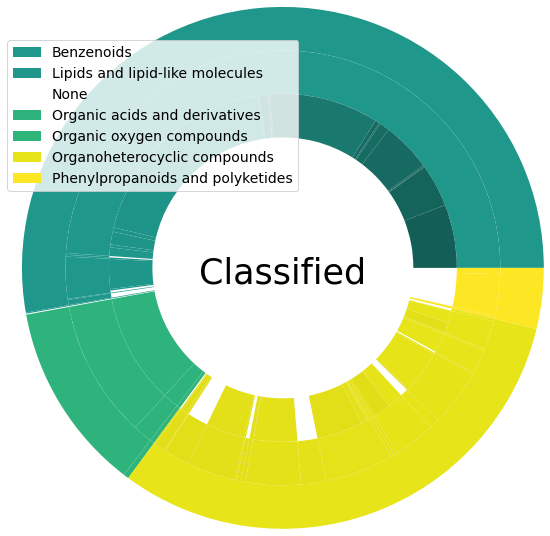

In [26]:
fig, ax = plt.subplots()

size = .5


for cs, n in [(cst, names_t), (csm, names_m), (csb, names_b)]:
    mask = n == 'None'
    cs[mask] = np.zeros(np.shape(cs[mask]))

patches, texts = ax.pie(counts_t, radius=3, colors=cst,
       wedgeprops=dict(width=size, edgecolor=(0,0,0,0)))
plt.legend(patches, names_t, loc='center left', bbox_to_anchor=(-0.8, 1.2),
           fontsize=14)

ax.pie(counts_m, radius=3-size, colors=csm,
       wedgeprops=dict(width=size, edgecolor=(0,0,0,0)))

ax.pie(counts_b, radius=3-2*size, colors=csb,
       wedgeprops=dict(width=size, edgecolor=(0,0,0,0)))

ax.set(aspect="equal")
plt.title('Classified', loc='center', fontdict={'size':35}, y=.4)
plt.show()

In [29]:
subs_nested = dataframe['cf_substituents']
substituents = []

for slist in subs_nested:
    try:
        substituents.extend(slist)
    except:
        pass
    
subs_df = pandas.DataFrame({'Sub':substituents})

Text(0, 0.5, 'Substituent group')

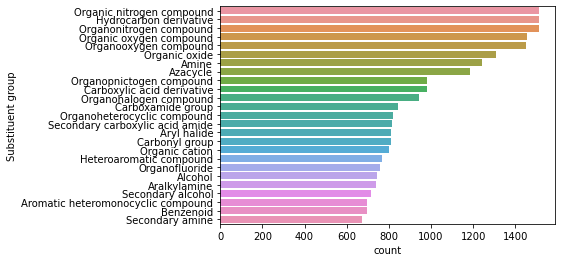

In [31]:
sns.countplot(y='Sub',data = subs_df, orient='v', order=subs_df['Sub'].value_counts().iloc[:25].index)

fig = plt.gcf()
plt.ylabel('Substituent group')

### PCA on x data - use some molecular fingerprint feature


In [47]:
task, dataset, transformer = deepchem.molnet.load_bace_regression(splitter=None)
X = dataset[0].X

In [48]:
pca = sklearn.decomposition.PCA(2)

In [49]:
X_pcs = pca.fit_transform(X)

In [50]:
pc_dataframe = pandas.DataFrame(data=X_pcs, columns = ['PC1', 'PC2'])

In [51]:
altair.Chart(pc_dataframe).transform_fold(
    ['PC1',
     'PC2'],
    as_ = ['Measurement_type', 'value']
).transform_density(
    density='value',
    bandwidth=0.3,
    groupby=['Measurement_type'],
    extent= [0, 5],
    counts = True,
    steps=200
).mark_area().encode(
    altair.X('value:Q'),
    altair.Y('density:Q', stack='zero'),
    altair.Color('Measurement_type:N')
).properties(width=400, height=100)

alt.Chart(...)